# Detección de Objetos
- COCO Dataset
- Faster R-CNN model

<b>Fuentes:</b> 
1. [Pytorch tutorial](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)
2. [PyTorch object detection with pre-trained networks](https://pyimagesearch.com/2021/08/02/pytorch-object-detection-with-pre-trained-networks/)


In [47]:
# Inicialización
import torch

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [48]:
# Definición de constantes 
import os
import numpy as np
import cv2 as cv

# esto es para que funcione matplotlib 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

BATCH_SIZE = 64
EPOCHS = 50
IMAGE_SIZE = 256
MODELS_DIR = 'models'
CLASSES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 
           'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
           'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 
           'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 
           'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 
           'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
           'snowboard', 'sports ball', 'kite', 'baseball bat', 
           'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 
           'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
           'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
           'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
           'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 
           'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
           'cell phone', 'microwave', 'oven', 'toaster', 'sink', 
           'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 
           'teddy bear', 'hair drier', 'toothbrush']

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
print('Num classes:', len(CLASSES))

Num classes: 91


## Función para dibujar los *bounding boxes* en la imagen

In [7]:
# Dibujamos los objetos detectados en la imagen
import cv2 as cv

def draw_bbox(detections,image, means=None):

    for i in range(len(detections["boxes"])):

        # seleccionamos objetos con un confidence suficientemente grande
        confidence = detections["scores"][i]

        if confidence > 0.8:

            # extraemos el bounding box
            box = detections["boxes"][i].detach().cpu().numpy()
            x0, y0, x1, y1 = box.astype("int")

            # extraemos la etiqueta
            idx = int(detections["labels"][i])
            label = CLASSES[idx]

            # dibujamos el bounding box y la etiqueta en la imagen
            cv.rectangle(image, (x0, y0), (x1, y1), COLORS[idx], 2)
            y = y0 - 15 if y0 - 15 > 15 else y0 + 15
            text = f"{label} - {confidence:.2f}"
            cv.putText(image, text, (x0, y), cv.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
            
            # mostramos el número de objetos
            if means != None:
                text = f"Objetos: {len(means)}"
                cv.putText(image, text, (20,20), cv.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2)
            
    return image


## Detección de objetos en imágenes con Faster R-CNN

In [ ]:
# Detección de objetos en la imagen con Faster R-CNN

import numpy as np
import torch
import cv2
from torchvision.models import detection
from ultralytics import YOLO



#model = detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device)
model = YOLO('yolo11n-pose.pt').to(device)
model.eval()

# load the image from disk
image_name = 'images/prueba3.jpg'
image = cv.imread(image_name)

# convertimos a RGB y ponemos en formato pytorch
orig = image.copy()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))

# añadimos dimensión para el batch y normalizamos
image = np.expand_dims(image, axis=0)
image = image / 255.0
image = torch.FloatTensor(image)

# ejecutamos el modelo con la imagen
image = image.to(device)
detections = model(image)[0]

# dibujamos las cajas con las etiquetas y scores
output = draw_bbox(detections, orig)

# mostramos la salida
cv.imshow('Output', output)
cv.waitKey(0)
cv.destroyAllWindows()


AttributeError: Can't get attribute 'PoseModel' on <module 'ultralytics.nn.tasks' from 'c:\\Users\\gerar\\anaconda3\\envs\\aa1\\lib\\site-packages\\ultralytics\\nn\\tasks.py'>

In [4]:
# Detección de objetos en la imagen con Faster R-CNN

import numpy as np
import torch
import cv2 as cv
from torchvision.models import detection
from ultralytics import YOLO



#model = detection.fasterrcnn_resnet50_fpn(pretrained=True).to(device)
model = YOLO('./yolov8x-pose.pt')


In [57]:
image_name = 'images/prueba3.jpg'
image = cv.imread(image_name)
results = model(image)

keypoints = results[0].keypoints

print(keypoints)

for keypoint in keypoints:
    keypoint_coordinates = keypoint.xy[0]
    right_wrists = keypoint_coordinates[10]
    conf = keypoint.conf[0, 10]

    if conf > 0.5:
        cv.circle(image, (int(right_wrists[0]), int(right_wrists[1])), 5, (0, 255, 0), -1)
    
cv.imshow('Output', image)
cv.waitKey(0)
cv.destroyAllWindows()



0: 448x640 12 persons, 1374.3ms
Speed: 6.0ms preprocess, 1374.3ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9727, 0.9708, 0.6449, 0.9646, 0.0915, 0.9972, 0.9973, 0.9893, 0.9863, 0.9870, 0.9826, 0.9992, 0.9992, 0.9983, 0.9984, 0.9884, 0.9895],
        [0.9937, 0.9876, 0.9729, 0.8931, 0.6742, 0.9974, 0.9971, 0.9816, 0.9792, 0.9741, 0.9766, 0.9964, 0.9963, 0.9804, 0.9812, 0.8737, 0.8781],
        [0.9939, 0.9948, 0.9302, 0.9720, 0.1837, 0.9981, 0.9969, 0.9935, 0.9799, 0.9930, 0.9807, 0.9992, 0.9989, 0.9986, 0.9978, 0.9881, 0.9844],
        [0.9700, 0.9489, 0.9362, 0.7410, 0.6182, 0.9945, 0.9954, 0.9427, 0.9565, 0.9076, 0.9255, 0.9969, 0.9973, 0.9933, 0.9941, 0.9732, 0.9759],
        [0.9727, 0.9484, 0.9484, 0.6368, 0.6501, 0.9933, 0.9845, 0.9382, 0.8111, 0.8907, 0.7769, 0.9947, 0.9920, 0.9894, 0.9825, 0.9711, 0.9568],
        [0.9852, 0.9827, 0.9349, 0.9297, 0.4271, 0.9970, 0.9976, 0.971

In [9]:
# Procesar imágenes de un vídeo y guardar a disco
import cv2 as cv
import torch
import numpy as np

video = cv.VideoCapture("videos/new_york.mp4")

status, img = video.read()
size=(img.shape[1], img.shape[0])

fourcc = cv.VideoWriter_fourcc(*'DIVX')
video_out = cv.VideoWriter('video1.mp4', fourcc, 30.0, size)

while status:
    orig = img.copy()
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = img.transpose((2, 0, 1))
    
    image = np.expand_dims(img, axis=0)
    image = image / 255.0
    image = torch.FloatTensor(image).to(device)

    detections = model(image)[0]
    output = draw_bbox(detections, orig)
    
    cv.imshow('Salida', output)
    video_out.write(output)
    
    status, img = video.read()
    if cv.waitKey(1)==27:
        status = False

    
video.release()
video_out.release()
cv.destroyAllWindows()


# Seguimiento de Objetos

In [49]:
# Inicialización
import torch
import os
import numpy as np
import cv2 as cv

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# esto es para que funcione matplotlib 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# definición de constantes 
CLASSES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 
           'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
           'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 
           'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 
           'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 
           'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
           'snowboard', 'sports ball', 'kite', 'baseball bat', 
           'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 
           'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
           'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 
           'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
           'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 
           'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
           'cell phone', 'microwave', 'oven', 'toaster', 'sink', 
           'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 
           'teddy bear', 'hair drier', 'toothbrush']

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
print('Num classes:', len(CLASSES))

Using cpu device
Num classes: 91


In [50]:
# calculamos la media
def compute_means(detections):
    new_means = []
    new_labels = []
    new_bbox = []
    for i in range(len(detections["boxes"])):
        confidence = detections["scores"][i]
        if confidence > 0.8:
            box = detections["boxes"][i].detach().cpu().numpy()
            x0, y0, x1, y1 = box.astype("int")
            new_means.append(((x0+x1)/2,(y0+y1)/2))
            new_bbox.append([x0,y0,x1,y1])
            
            # extraemos la etiqueta
            label = int(detections["labels"][i])
            new_labels.append(label)

    return new_means, new_labels, new_bbox

def distance(a,b):
    d1 = a[0]-b[0]
    d2 = a[1]-b[1]
    return d1*d1+d2*d2

def match_objects(means, labels, bbox, new_means, new_labels, new_bbox):
    points = []
    point_labels = []
    for i in range(len(new_means)):
        mean = new_means[i]
        label = new_labels[i]
        box = new_bbox[i]
        
        j=0
        min_dist=9999
        min_pos=9999
        threshold = 200
        while j<len(labels):
            d = distance(mean, means[j][-1])
            if label == labels[j] and d<min_dist:
                min_dist = d
                min_pos = j
            j+=1
        
        if min_dist>threshold:
            means.append([mean])
            labels.append(label)
            bbox.append([box])
        else:
            means[min_pos].append(mean)
            bbox[min_pos].append(box)
            points.append(mean)
            point_labels.append(label)
            
    return points, point_labels
    
def draw_points(tracking, points, point_labels):
    for i in range(len(points)):
        color = (255,0,0) #COLORS[point_labels[i]] #(255,0,0)
        tracking[int(points[i][1])-1, int(points[i][0])-1]=color
        tracking[int(points[i][1])-1, int(points[i][0])]=color
        tracking[int(points[i][1]), int(points[i][0])-1]=color
        tracking[int(points[i][1]), int(points[i][0])]=color
        tracking[int(points[i][1])+1, int(points[i][0])]=color
        tracking[int(points[i][1]), int(points[i][0])+1]=color
        tracking[int(points[i][1])+1, int(points[i][0])+1]=color
        tracking[int(points[i][1])-1, int(points[i][0])+1]=color
        tracking[int(points[i][1])+1, int(points[i][0])-1]=color
        
    

In [ ]:
# Procesar imágenes de un vídeo o de la webcam
import numpy as np
import torch
import cv2
from torchvision.models import detection

model = detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True).to(device)

#video = cv.VideoCapture(0)
video = cv.VideoCapture("videos/people2.mp4")


status, img = video.read()
size=(img.shape[1], img.shape[0])

fourcc = cv.VideoWriter_fourcc(*'DIVX')
video_out = cv.VideoWriter('video1.mp4', fourcc, 20.0, size)

tracking = 255*np.ones((img.shape[0], img.shape[1], 3))

model = YOLO('./yolov8x-pose.pt')

means = []
labels = []
bbox = []
pos = 10
while status:
    
    # adaptamos la nueva imagen
    orig = img.copy()
    original = img.copy()
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = img.transpose((2, 0, 1))
    
    # calculamos las predicciones
    image = np.expand_dims(img, axis=0)
    image = image / 255.0
    image = torch.FloatTensor(image).to(device)
    detections = model(image)

    keypoints = detections[0].keypoints

    for keypoint in keypoints:
        keypoint_coordinates = keypoint.xy[0]
        right_wrists = keypoint_coordinates[10]
        conf = keypoint.conf[0, 10]

        if conf > 0.5:
            cv.circle(image, (int(right_wrists[0]), int(right_wrists[1])), 5, (0, 255, 0), -1)
        
    cv.imshow('Output', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

    
    # calculamos la media
    new_means, new_labels, new_bbox = compute_means(detections)
    
    # buscamos la correspondencia anterior
    points, point_labels = match_objects(means, labels, bbox, new_means, new_labels, new_bbox)
    
    # dibujamos los nuevos puntos de las trayectorias
    draw_points(tracking, points, point_labels)
    
    # dibujamos los objetos detectados
    img_detections = draw_bbox(detections, orig, labels)
    
    # mezclamos las dos imágenes
    output = img_detections&tracking.astype(np.uint8)
    output[output>255]=255
    output[output<0]=0
    
    # mostramos el contenido de un bounding box aparte
    if len(bbox)>pos:
        x0=bbox[pos][-1][0]
        y0=bbox[pos][-1][1]
        x1=bbox[pos][-1][2]
        y1=bbox[pos][-1][3]

        if x0<x1 and y0<y1:
            subimage=original[y0:y1,x0:x1,:]
            dim = (3*subimage.shape[1], 3*subimage.shape[0])
            subimage=cv.resize(subimage,dim, interpolation = cv.INTER_AREA)
            cv.imshow('Bbox', subimage)
            
    cv.imshow('Output', output.astype(np.uint8))
    cv.imshow('Tracking', tracking)
    
    video_out.write(output)
    
    status, img = video.read()
    
    if cv.waitKey(1)==27:
        status = False
    
video.release()
video_out.release()
cv.destroyAllWindows()


AssertionError: targets should not be none when in training mode

In [59]:
class HandPerson():

    def __init__(self):
        self.x = []
        self.y = []
    
    def add(self, x, y):
        self.x.append(x)
        self.y.append(y)
    
    def calculate_distance(self, x, y):
        if len(self.x)>0 and len(self.y)>0:
            distance = np.sqrt((x-self.x[-1])**2 + (y-self.y[-1])**2)
            if distance<5:
                self.add(x,y)
            else:
                return None
        else:
            self.add(x,y)

In [84]:
# Procesar imágenes de un vídeo o de la webcam
import numpy as np
import torch
import cv2
from torchvision.models import detection

model = detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True).to(device)

#video = cv.VideoCapture(0)
video = cv.VideoCapture("videos/people2.mp4")


status, img = video.read()
size=(img.shape[1], img.shape[0])

fourcc = cv.VideoWriter_fourcc(*'DIVX')
video_out = cv.VideoWriter('video1.mp4', fourcc, 20.0, size)

tracking = 255*np.ones((img.shape[0], img.shape[1], 3))

model = YOLO('./yolov8x-pose.pt')

person = HandPerson()
coordinate_x = []
coordinate_y = []
pos = 10
t = 0
time = []
i = 0
while status:
    
    # adaptamos la nueva imagen
    orig = img.copy()
    original = img.copy()
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    detections = model(img)

    if i < 1:
        keypoints = detections[0].keypoints
        keypoint = keypoints[5]
        keypoint_coordinates = keypoint.xy[0]
        right_wrists = keypoint_coordinates[10]
        person.add(int(right_wrists[0]), int(right_wrists[1]))
    else:
        keypoints = detections[0].keypoints

        for keypoint in keypoints:
            keypoint_coordinates = keypoint.xy[0]
            right_wrists = keypoint_coordinates[10]
            conf = keypoint.conf[0, 10]
            if conf > 0.2:
                cv.circle(img, (int(right_wrists[0]), int(right_wrists[1])), 5, (0, 255, 0), -1)
                person.calculate_distance(int(right_wrists[0]), int(right_wrists[1]))
    
    time.append(i)

    i += 1
    
    cv.imshow('Tracking', img)
    
    status, img = video.read()
    
    if cv.waitKey(1)==27:
        status = False
    
video.release()
video_out.release()
cv.destroyAllWindows()


c:\Users\gerar\anaconda3\envs\aa1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gerar\anaconda3\envs\aa1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



0: 384x640 11 persons, 971.1ms
Speed: 4.2ms preprocess, 971.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1006.6ms
Speed: 2.5ms preprocess, 1006.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 992.5ms
Speed: 8.5ms preprocess, 992.5ms inference, 10.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 983.3ms
Speed: 0.0ms preprocess, 983.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 980.3ms
Speed: 0.0ms preprocess, 980.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 981.1ms
Speed: 3.0ms preprocess, 981.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 982.0ms
Speed: 3.0ms preprocess, 982.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 969.3ms
Speed: 3.5ms preprocess, 969.3ms inference, 2.7ms postp

[0, 1, 2, 3, 4, 5]
[543, 545, 545, 544, 544, 545] [353, 350, 346, 342, 338, 335]


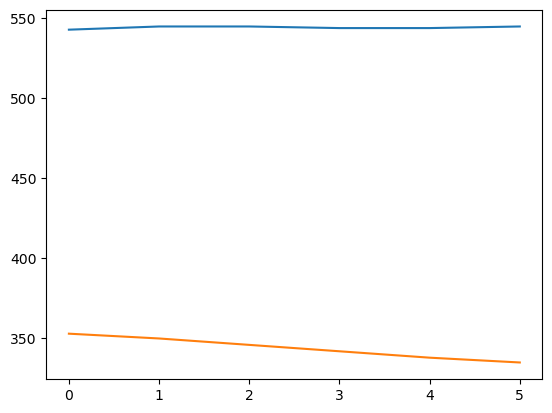

In [83]:
t = [i for i in range(len(person.x))]

print(t)
print(person.x, person.y)

import matplotlib.pyplot as plt
plt.plot(t, person.x)
plt.plot(t, person.y)
plt.show()

In [ ]:
# Procesar imágenes de un vídeo o de la webcam
import numpy as np
import torch
import cv2
from torchvision.models import detection

model = detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True).to(device)
model.eval()

#video = cv.VideoCapture(0)
video = cv.VideoCapture("videos/people2.mp4")


status, img = video.read()
size=(img.shape[1], img.shape[0])

fourcc = cv.VideoWriter_fourcc(*'DIVX')
video_out = cv.VideoWriter('video1.mp4', fourcc, 20.0, size)

tracking = 255*np.ones((img.shape[0], img.shape[1], 3))

means = []
labels = []
bbox = []
pos = 10
while status:
    
    # adaptamos la nueva imagen
    orig = img.copy()
    original = img.copy()
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = img.transpose((2, 0, 1))
    
    # calculamos las predicciones
    image = np.expand_dims(img, axis=0)
    image = image / 255.0
    image = torch.FloatTensor(image).to(device)
    detections = model(image)[0]
    
    # calculamos la media
    new_means, new_labels, new_bbox = compute_means(detections)
    
    # buscamos la correspondencia anterior
    points, point_labels = match_objects(means, labels, bbox, new_means, new_labels, new_bbox)
    
    # dibujamos los nuevos puntos de las trayectorias
    draw_points(tracking, points, point_labels)
    
    # dibujamos los objetos detectados
    img_detections = draw_bbox(detections, orig, labels)
    
    # mezclamos las dos imágenes
    output = img_detections&tracking.astype(np.uint8)
    output[output>255]=255
    output[output<0]=0
    
    # mostramos el contenido de un bounding box aparte
    if len(bbox)>pos:
        x0=bbox[pos][-1][0]
        y0=bbox[pos][-1][1]
        x1=bbox[pos][-1][2]
        y1=bbox[pos][-1][3]

        if x0<x1 and y0<y1:
            subimage=original[y0:y1,x0:x1,:]
            dim = (3*subimage.shape[1], 3*subimage.shape[0])
            subimage=cv.resize(subimage,dim, interpolation = cv.INTER_AREA)
            cv.imshow('Bbox', subimage)
            
    cv.imshow('Output', output.astype(np.uint8))
    cv.imshow('Tracking', tracking)
    
    video_out.write(output)
    
    status, img = video.read()
    
    if cv.waitKey(1)==27:
        status = False
    
video.release()
video_out.release()
cv.destroyAllWindows()
